## Explore the classes

In [1]:
classes_dict = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 
                5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 
                10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 
                15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 
                20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 
                25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 
                30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 
                35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 
                40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 
                45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 
                50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 
                55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 
                60: 'y', 61: 'z'}
class_keys = [str(i) for i in classes_dict.keys()]
class_keys.sort()

## Load model

In [2]:
from keras.models import load_model
# Load the model
model = load_model('model_lenet.h5')

## Testing with external data

#### Load Image

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

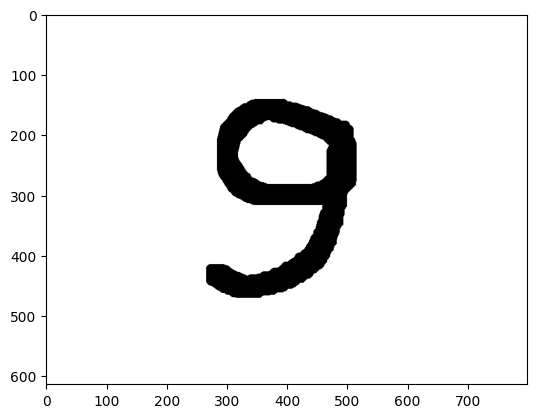

(614, 799)


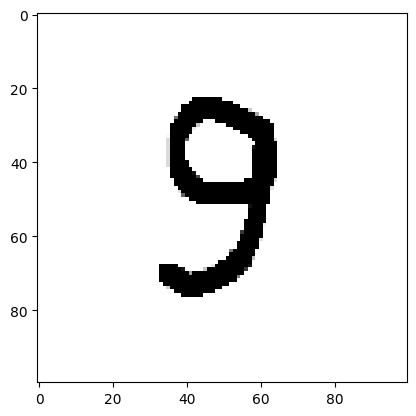

In [4]:
org_img = cv2.imread("ext/my_9.jpg", cv2.IMREAD_GRAYSCALE)
ret, test_img = cv2.threshold(org_img, 150, 255, cv2.THRESH_BINARY)
test_img = cv2.dilate(test_img, np.ones((3, 3), np.uint8), iterations=0)
test_img = cv2.erode(test_img, np.ones((5, 5), np.uint8), iterations=5)
plt.imshow(test_img, cmap="gray")
plt.show()
print(test_img.shape)
test_img = cv2.resize(test_img, (100, 100))
plt.imshow(test_img, cmap="gray")
test_input = test_img.reshape((1, 100, 100, 1))

### Detect character in image

In [5]:
man_pred = model.predict(test_input)
max_pred = man_pred.max(1)
pred_key = int(np.where(man_pred == max_pred)[1])
print(f"Prediction key: {pred_key}")
# folder_id = int(list(train_ds.class_indices.keys())[list(train_ds.class_indices.values()).index(pred_key)])
folder_id = int(class_keys[pred_key])
print(f"Folder id: {folder_id}")
print(f"Predicted letter: {classes_dict[folder_id]}")

1/1 [==============================] - 0s 156ms/step
Prediction key: 61
Folder id: 9
Predicted letter: 9
